# Testing Band Pass Filter

In [1]:
%load_ext autoreload
%autoreload 2

from synchronization import plots
from synchronization import runner
from synchronization import analysis

In [2]:
params = {
  "runtime": 3000.0,
  "J_itoi": 3.0,
  "J_etoe": 0.1
}

model = runner.run(modified_params=params, file_name="base")

Starting simulation at t=0. s for a duration of 3. s
2.61115 s (87%) simulated in 10s, estimated 1s remaining.
3. s (100%) simulated in 11s


In [3]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("base")

Average E firing frequency: 20.26814719973059
Average I firing frequency: 38.69948102182169


(<Figure size 720x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13fdcfa10>)

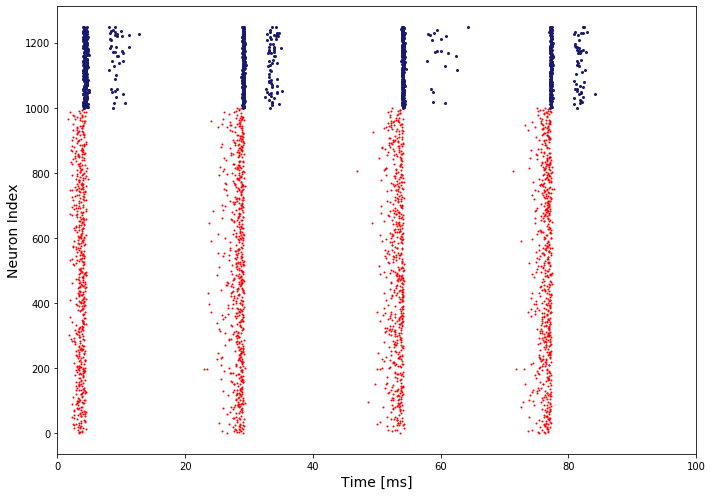

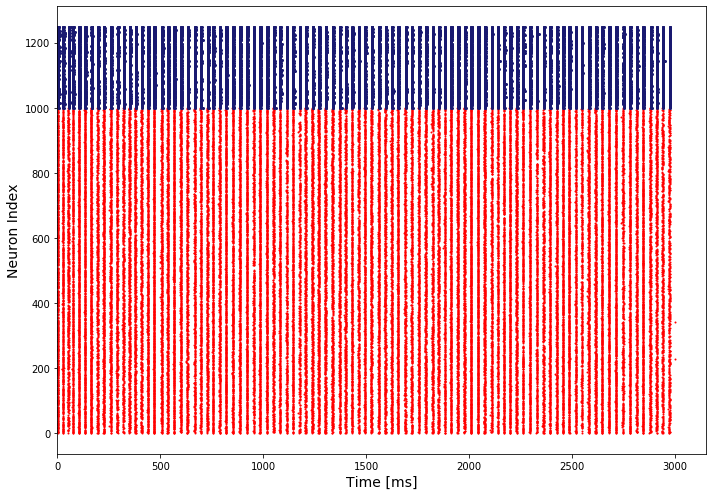

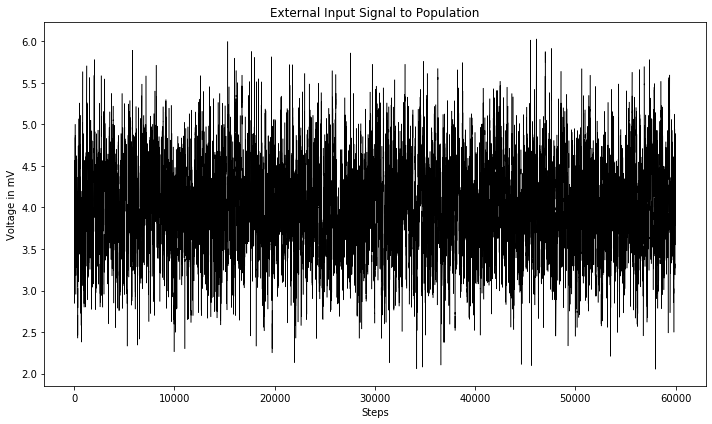

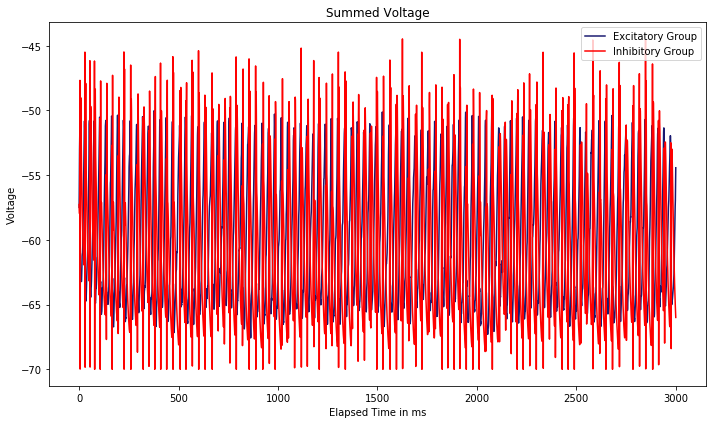

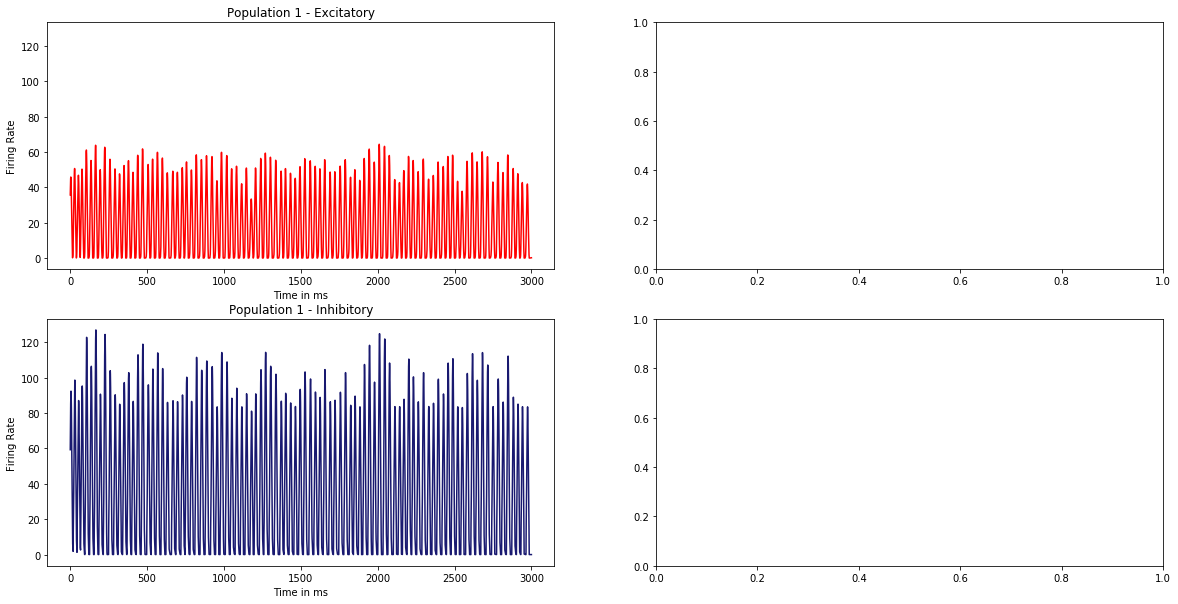

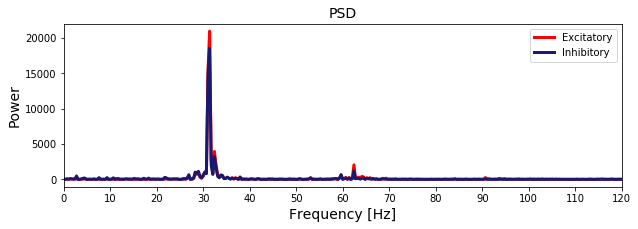

In [4]:
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(model=model)
plots.lfp(model=model)
plots.population_rates(model)
plots.psd(model, title="PSD")

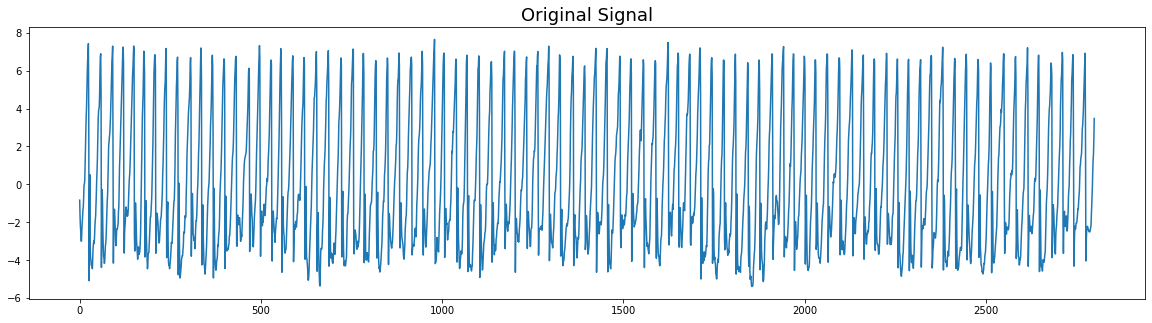

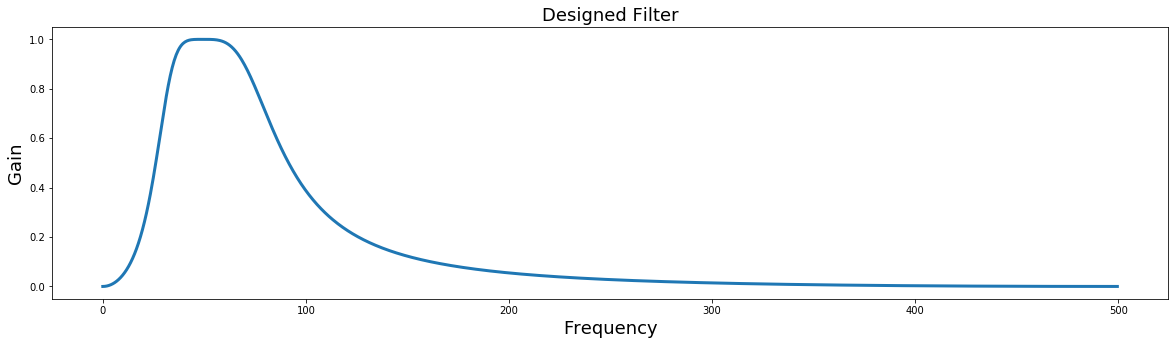

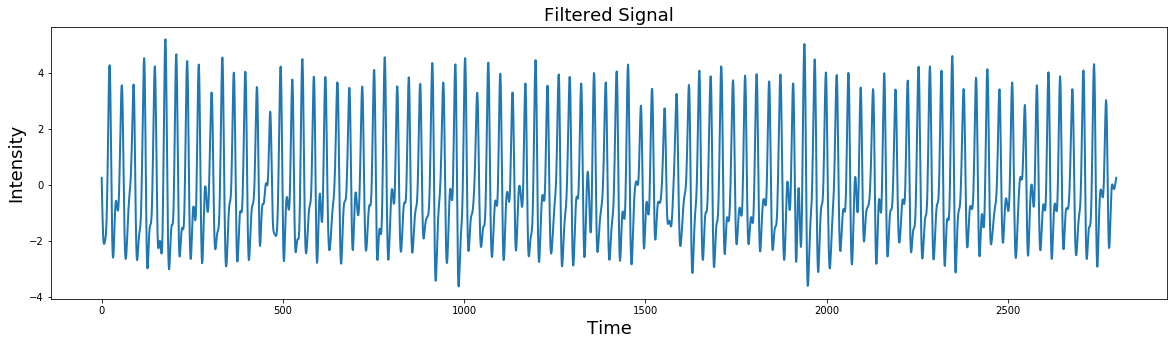

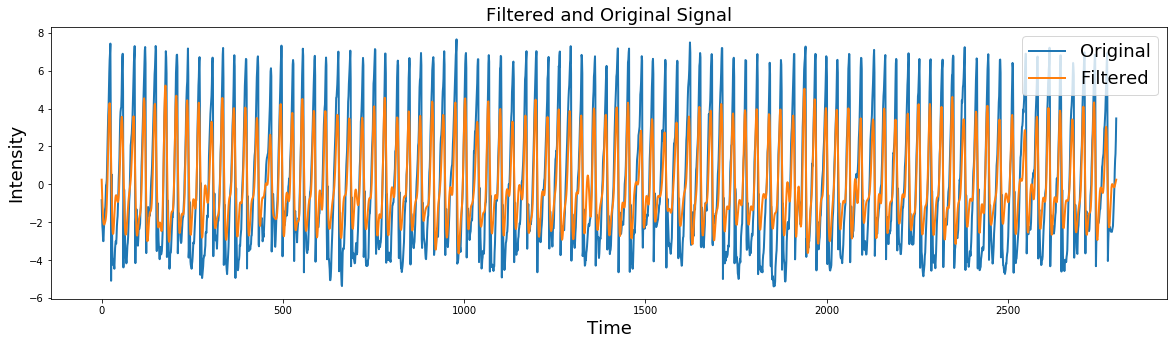

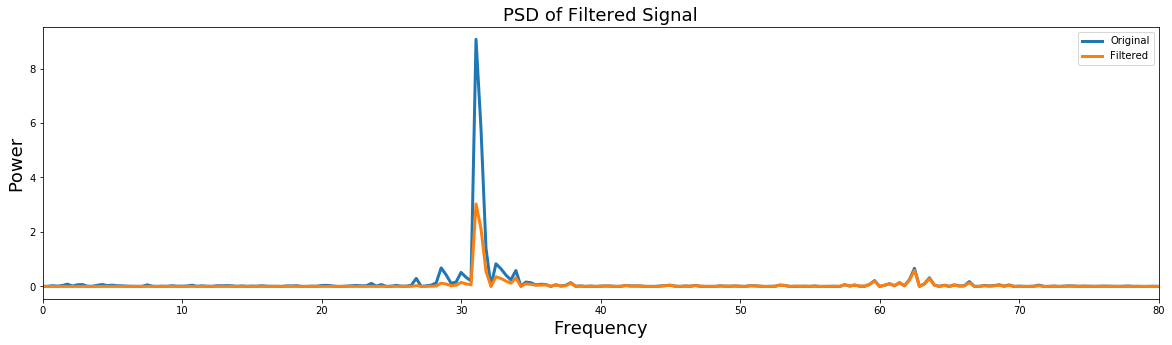

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import butter
from scipy.signal import filtfilt
from scipy.signal import freqz
from synchronization import processing
from matplotlib import mlab


def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.title("Designed Filter", fontsize=18)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)

signal = processing.lfp_single_net(model, skip=200)
signal = signal - signal.mean()

# 300 Hz allows to sample frequencies < 150
# why do we have here 1000?
# For band_power
fs = 1000

filter_order = 2
lowcut = 30.0
highcut = 80.0

# Create the filter
b, a = butter(filter_order, [lowcut, highcut], btype='bandpass', fs=fs)

# Apply the filter
filtered = filtfilt(b, a, signal)

# Original 
plt.figure(figsize=(20,5))
plt.plot(signal)
plt.title("Original Signal", fontsize=18)

# Filter
plot_filter(b, a, fs)

# Filtered Signal
plt.figure(figsize=(20,5))
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title("Filtered Signal", fontsize=18)

# Filtered Signal and Original Signal
plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title("Filtered and Original Signal", fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

# PSD of Filter
plt.figure(figsize=(20,5))
psd, freqs = mlab.psd(filtered, NFFT=len(filtered), Fs=fs, noverlap=0, window=mlab.window_none)
psd_2, freqs = mlab.psd(signal, NFFT=len(filtered), Fs=fs, noverlap=0, window=mlab.window_none)

plt.xlim(0, 80)
plt.title("PSD of Filtered Signal", fontsize=18)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Power", fontsize=18)
plt.plot(freqs, psd_2, linewidth=3.0)
plt.plot(freqs, psd, linewidth=3.0)
plt.legend(["Original", "Filtered"])